<a href="https://colab.research.google.com/github/DataScienceAndEngineering/deep-learning-final-project-project-sidewalk/blob/nicholas/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading all necessary packages
import tensorflow as tf
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt

#Extract the dataset into colab
!unzip ./drive/MyDrive/tensorflow_datasets/downloads/manual/leftImg8bit_trainvaltest.zip
!unzip ./drive/MyDrive/tensorflow_datasets/downloads/manual/gtFine_trainvaltest.zip


Streaming output truncated to the last 5000 lines.
  inflating: gtFine/test/berlin/berlin_000117_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000114_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000434_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000483_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000254_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000490_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000448_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000099_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000068_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000288_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000409_00001

In [9]:
def obtain_paths(subset='train'):
  #Returns filepaths of all labels and images which include a sidewalk segmentation
  LabelsDir = f'./gtFine/{subset}'
  labels_files = []
  img_files = []
  for root, dirs, files in os.walk(LabelsDir):
    for filename in files:
      if filename.endswith('labelIds.png'):
        f = os.path.join(root, filename)
        labels = np.array(PIL.Image.open(f))
        if 8 in labels:
          labels_files.append(f)
          img_files.append('./leftImg8bit' + f[8:-19] + 'leftImg8bit.png')
  return labels_files, img_files

train_masks, train_images = obtain_paths('train')
val_masks, val_images = obtain_paths('val')
test_masks, test_images = obtain_paths('test')

print(f'n_train: {len(train_masks)}')
print(f'n_val: {len(val_masks)}')
print(f'n_test: {len(test_masks)}')

n_train: 2811
n_val: 466
n_test: 0


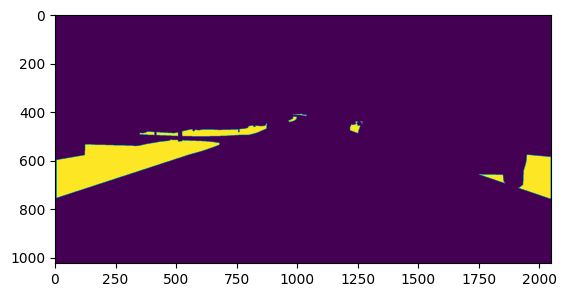

In [10]:
def mask_processing(mask_path):
    #Removes extra segmentations from mask, returning only sidewalk info.
    #Input path to mask file, returns image (possibly re-save in new directory_)
    mask = np.array(PIL.Image.open(mask_path))
    mask = mask==8
    return mask
mask = mask_processing(train_masks[0])
plt.imshow(mask)

In [4]:
#Ensuring values of 8 correspond to sidewalk segmentations

#cities = ['berlin', 'bielefeld', 'bonn', 'leverkusen', 'mainz', 'munich']
#for i in cities:
i = 'cologne'
tImage = PIL.Image.open(f'./leftImg8bit/train/{i}/{i}_000100_000019_leftImg8bit.png')
tMask = PIL.Image.open(f'./gtFine/train/{i}/{i}_000100_000019_gtFine_labelIds.png')
Mask = np.array(tMask)
Image = np.array(tImage)

#Displaying mask and image pair, printing mask value for sidewalk location
plt.figure()
plt.imshow(Mask)
plt.figure()
plt.imshow(Image)
print(Mask[800,2000])

8


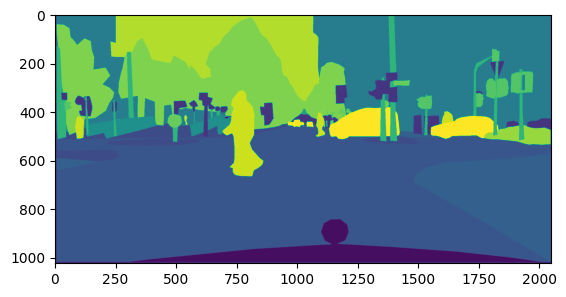

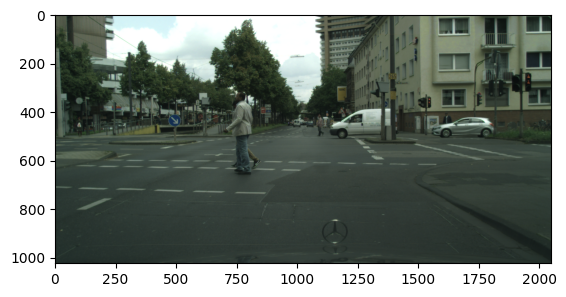

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(Mask)
plt.figure()
plt.imshow(Image)
print(Mask[800,2000])

In [ ]:
np.unique(Mask)